In [1]:
from __future__ import print_function, division
from builtins import range, input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob


Using TensorFlow backend.
C:\Users\P Suchith\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\P Suchith\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\P Suchith\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\P Suchith\anaconda3\lib\site-packages\tensorflow\python\fra

In [2]:
IMAGE_SIZE = [224, 224] 
epochs = 6
batch_size = 50

In [3]:
train_path = 'C:\\Users\\P Suchith\\Desktop\\fruit\\train'
valid_path = 'C:\\Users\\P Suchith\\Desktop\\fruit\\test'

In [4]:
image_files = glob(train_path + '\*\*')
valid_image_files = glob(valid_path + '\*\*')
folders = glob(train_path + '/*')

In [5]:

valid_image_files

['C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\325_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\326_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\327_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\32_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\33_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\34_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\35_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\36_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\37_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\38_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\39_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\3_100.jpg',
 'C:\\Users\\P Suchith\\Desktop\\fruit\\test\\Apple Braeburn\\40_100.jpg',
 'C:\\Users\\P Suchith\

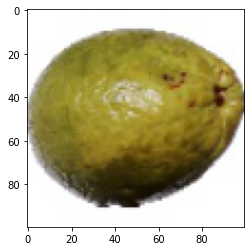

In [6]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [10]:
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


In [13]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [14]:
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)

for k, v in test_gen.class_indices.items():
  labels[v] = k

print(labels)

Found 871 images belonging to 9 classes.
{'Apple Braeburn': 0, 'Apricot': 1, 'Banana': 2, 'Guava': 3, 'Orange': 4, 'Papaya': 5, 'Pineapple': 6, 'Pomegranate': 7, 'Strawberry': 8}
['Apple Braeburn', 'Apricot', 'Banana', 'Guava', 'Orange', 'Papaya', 'Pineapple', 'Pomegranate', 'Strawberry']


In [15]:

train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)




Found 2446 images belonging to 9 classes.
Found 871 images belonging to 9 classes.

Epoch 1/6
48/48 [==============================] - 1105s 23s/step - loss: 4.2357 - accuracy: 0.9011 - val_loss: 0.0084 - val_accuracy: 0.9882
Epoch 2/6
48/48 [==============================] - 1074s 22s/step - loss: 0.5567 - accuracy: 0.9745 - val_loss: 4.7684e-09 - val_accuracy: 0.9951
Epoch 3/6
48/48 [==============================] - 1059s 22s/step - loss: 0.1781 - accuracy: 0.9896 - val_loss: 0.0256 - val_accuracy: 0.9878
Epoch 4/6
48/48 [==============================] - 1064s 22s/step - loss: 0.0617 - accuracy: 0.9971 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/6
48/48 [==============================] - 1064s 22s/step - loss: 0.2069 - accuracy: 0.9912 - val_loss: 0.0000e+00 - val_accuracy: 0.9939
Epoch 6/6
48/48 [==============================] - 1078s 22s/step - loss: 0.0426 - accuracy: 0.9983 - val_loss: 5.8433e-04 - val_accuracy: 0.9817


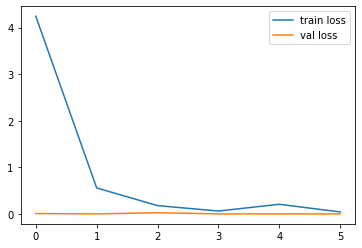

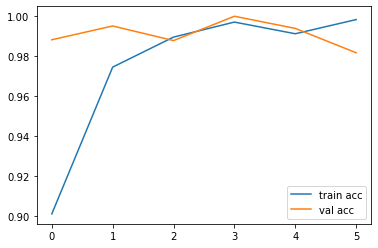

In [16]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
def get_confusion_matrix(data_path, N):
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)

    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm


In [18]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 2446
Found 2446 images belonging to 9 classes.
[[254   1   0   0   0   0   0   1  12]
 [  0 199   0   0   0   0   0   0   0]
 [  0   0 367   0   0   0   0   0   0]
 [  0   0   0 252   0   0   0   0   0]
 [  0   0   0   0 245   0   0   0   0]
 [  0   1   0   0   0 284   0   0   0]
 [  0   0   0   0   0   0 189   0   5]
 [  0   0   0   0   0   0   0 281   0]
 [  0   0   0   0   0   0   0   0 355]]
Generating confusion matrix 871
Found 871 images belonging to 9 classes.
[[ 99   3   0   0   0   0   0   2   4]
 [  0  90   0   0   0   0   0   0   0]
 [  0   0 108   0   0   0   0   0   7]
 [  0   0   0  78   0   0   0   0   0]
 [  0   0   0   0  99   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   0  80   0   0]
 [  0   0   0   0   0   0   0  98   0]
 [  0   0   0   0   0   0   0   0 103]]


In [27]:
loaded_image = image.load_img(path=valid_image_files[200], target_size=(224,224,3))
loaded_image1 = image.load_img(path=valid_image_files[600], target_size=(224,224,3))

img_array = image.img_to_array(loaded_image)
img_array1 = image.img_to_array(loaded_image1)

img_np_array = np.expand_dims(img_array, axis = 0)
img_np_array1 = np.expand_dims(img_array1, axis = 0)
 
predictions = model.predict(img_np_array)
pr2=model.predict(img_np_array1)
print(predictions)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.6383276e-21 0.0000000e+00 0.0000000e+00 9.5113603e-23]]


In [28]:
result_classes = predictions.argmax(axis=-1)
result_classes1 = pr2.argmax(axis=-1)
print(result_classes,result_classes1)

[2] [6]


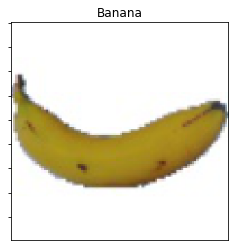

In [29]:
plt.title(labels[result_classes[0]])
plt.tick_params(
                axis='both',        
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False,
                labelleft=False)
plt.imshow(loaded_image)
plt.show()

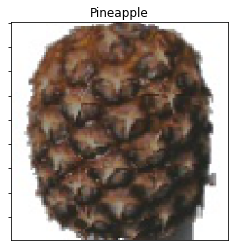

In [30]:
plt.title(labels[result_classes1[0]])
plt.tick_params(
                axis='both',        
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False,
                labelleft=False)
plt.imshow(loaded_image1)
plt.show()